In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from config import user
from config import password2
from urllib import parse
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [9]:
# Creating a connection string for the Glassdoor database
protocol="postgresql"
username=user
password=parse.quote(password2)
host="localhost"
port=5432
database_name="Glassdoor_Reviews"

Con_Str=f"{protocol}://{username}:{password}@{host}:{port}/{database_name}"
        
# Create an engine instance
Con = create_engine(Con_Str)

# Connect to PostgreSQL server
dbConnection = Con.connect();

# Read data from PostgreSQL database table and load into a DataFrame instance
data_csv = pd.read_sql("select * from glassdoor", dbConnection);

# Print the DataFrame
print(data_csv);

# Close the database connection
dbConnection.close();

                         firm date_review  \
0       AFH-Wealth-Management  2020-10-01   
1       AFH-Wealth-Management  2021-02-05   
2       AFH-Wealth-Management  2021-02-07   
3       AFH-Wealth-Management  2021-02-07   
4       AFH-Wealth-Management  2021-05-12   
...                       ...         ...   
104505         the-LEGO-Group  2021-05-21   
104506         the-LEGO-Group  2021-05-25   
104507         the-LEGO-Group  2021-05-31   
104508         the-LEGO-Group  2021-06-02   
104509         the-LEGO-Group  2021-06-04   

                                  job_title  \
0                      Office Administrator   
1                           Quality Control   
2                         IFA Administrator   
3                     Investment Operations   
4               Client Engagement Executive   
...                                     ...   
104505   Sales Associate (Brick Specialist)   
104506               Senior Product Manager   
104507           Senior Experience D

In [10]:
data_csv

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2020-10-01,Office Administrator,"Former Employee, more than 3 years","Bromsgrove, England, England",2,1.0,3.0,1.0,1.0,2.0,2.0,x,o,x,The people both make and destroy this place,"Great people in some places, excellent Christm...","Poor pay, huge gap for pay between senior mana..."
1,AFH-Wealth-Management,2021-02-05,Quality Control,Former Employee,"Birmingham, England, England",1,3.0,1.0,2.0,1.0,1.0,1.0,x,o,o,Very low salaries,"Majority of the people there are lovely, and t...",Salaries are much lower than market competitor...
2,AFH-Wealth-Management,2021-02-07,IFA Administrator,"Former Employee, less than 1 year","Bromsgrove, England, England",4,3.0,3.0,4.0,4.0,4.0,2.0,v,o,v,Good,"Nice environment, love people, not too stressful",Management can be clicky at times
3,AFH-Wealth-Management,2021-02-07,Investment Operations,"Former Employee, more than 1 year","Birmingham, England, England",3,5.0,5.0,4.0,3.0,1.0,2.0,x,o,v,AFH Review,-Great People\n-Heading in a good direction ge...,-Low Salary\n-Middle Management likes to micro...
4,AFH-Wealth-Management,2021-05-12,Client Engagement Executive,"Former Employee, less than 1 year","Birmingham, England, England",1,1.0,2.0,1.0,1.0,1.0,1.0,x,x,x,Terrible- avoid like the plague,"None, they lie about working hours, bonuses, p...",-Unachievable bonus unfairly set by manager\n-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104505,the-LEGO-Group,2021-05-21,Sales Associate (Brick Specialist),"Former Employee, less than 1 year","Bloomington, MN",4,5.0,4.0,5.0,4.0,2.0,5.0,v,v,v,Working at LEGO was pretty cool,It's fun to walk around the LEGO store,Doesn't pay a living wage
104506,the-LEGO-Group,2021-05-25,Senior Product Manager,Current Employee,"London, England, England",4,3.0,4.0,2.0,3.0,2.0,3.0,v,r,v,A great brand,Family owned and a great brand. Danish culture...,"A lot of bureaucracy, hard to make things happ..."
104507,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,5.0,v,v,v,Awesome place to work,It's a company with a clear purpose and one th...,"Being a global brand, compliance is important...."
104508,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations


In [11]:
data_csv = data_csv.drop(labels=['overall_rating'], axis=1)

In [12]:
data_csv.nunique()

firm                      421
date_review               271
job_title               18440
current                    20
location                 6229
work_life_balance           5
culture_values              5
diversity_inclusion         5
career_opp                  5
comp_benefits               5
senior_mgmt                 5
recommend                   3
ceo_approv                  4
outlook                     4
headline                55856
pros                   102073
cons                   101645
dtype: int64

In [13]:
data_csv = data_csv.drop(labels=['headline', 'pros', 'cons','job_title', 'date_review','location', 'current'], axis=1)

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
df_numeric = pd.get_dummies(data_csv)
df_numeric

,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,firm_AFH-Wealth-Management,firm_AJ-Bell,firm_ALDI,firm_AQA,...,recommend_v,recommend_x,ceo_approv_o,ceo_approv_r,ceo_approv_v,ceo_approv_x,outlook_o,outlook_r,outlook_v,outlook_x
0,1.0,3.0,1.0,1.0,2.0,2.0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,3.0,1.0,2.0,1.0,1.0,1.0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,3.0,3.0,4.0,4.0,4.0,2.0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,5.0,5.0,4.0,3.0,1.0,2.0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104505,5.0,4.0,5.0,4.0,2.0,5.0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
104506,3.0,4.0,2.0,3.0,2.0,3.0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
104507,5.0,5.0,5.0,5.0,5.0,5.0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
104508,4.0,5.0,4.0,4.0,4.0,4.0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)
X

array([[-1.84600926, -0.61073655, -2.5160139 , ..., -0.52650431,
        -1.02991822,  3.03135929],
       [-0.35048454, -2.1925384 , -1.67166568, ..., -0.52650431,
        -1.02991822, -0.32988501],
       [-0.35048454, -0.61073655,  0.01703077, ..., -0.52650431,
         0.97095088, -0.32988501],
       ...,
       [ 1.14504018,  0.97106529,  0.861379  , ..., -0.52650431,
         0.97095088, -0.32988501],
       [ 0.39727782,  0.97106529,  0.01703077, ..., -0.52650431,
         0.97095088, -0.32988501],
       [ 0.39727782,  0.97106529,  0.01703077, ..., -0.52650431,
        -1.02991822, -0.32988501]])

In [16]:
# Perform dimensionality reduction with PCA. How did the number of the features change?
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(X)
df_pca.shape

(104510, 385)

In [17]:
df_data_pca = pd.DataFrame(df_pca)
df_data_pca 

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
0,5.320809,0.275326,-2.907251,-0.630991,2.506292,3.999489,0.301094,-0.122419,0.803719,-1.807642,...,-3.532127,-9.900919,4.424087,25.729119,-10.659796,6.059246,-2.183724,-0.702002,-16.081952,-53.411753
1,5.154718,1.973648,-1.846867,-0.820232,1.641302,4.883215,0.352765,0.095179,0.761286,-1.649121,...,-3.531319,-9.900625,4.423978,25.729195,-10.659646,6.059280,-2.183714,-0.702551,-16.081352,-53.411247
2,0.406954,0.791532,-1.442261,-1.086260,2.842164,4.242130,0.298639,0.125922,0.848770,-1.357007,...,-3.532168,-9.900780,4.423928,25.729014,-10.660030,6.059354,-2.183274,-0.702331,-16.081748,-53.410883
3,1.757333,0.863496,-1.669932,-0.290294,2.405552,4.359759,0.962401,-0.120591,0.845922,-1.514729,...,-3.532368,-9.901138,4.423880,25.729250,-10.660167,6.059282,-2.183288,-0.702413,-16.081603,-53.411307
4,6.649267,-1.459786,-4.311139,0.158383,2.411342,3.149425,0.455139,0.067625,0.665912,-1.439508,...,-3.532708,-9.901210,4.423718,25.729088,-10.660385,6.059169,-2.183390,-0.702127,-16.081404,-53.411722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104505,-2.218082,-0.985704,-0.785147,0.271752,-0.318770,1.141820,0.553285,0.342119,0.186392,0.724554,...,0.065535,0.054025,0.001341,-0.033453,0.022631,0.104140,0.037893,-0.000554,-0.017324,0.013263
104506,0.440075,-1.429008,0.539361,-0.545293,0.016604,1.177244,0.237213,0.639947,0.354374,1.417153,...,0.064986,0.054515,0.001305,-0.033274,0.022523,0.103655,0.038331,-0.001126,-0.017414,0.013058
104507,-3.414269,-0.759126,-0.698327,0.613505,-0.205470,0.545348,0.033923,0.144314,0.296112,0.642509,...,0.065184,0.053946,0.001395,-0.033421,0.022643,0.104357,0.037624,-0.000748,-0.017198,0.013384
104508,-2.252124,-1.006223,-0.885829,0.113834,-0.304693,0.933020,0.036654,0.322554,0.222904,0.665132,...,0.064966,0.053956,0.001304,-0.033250,0.022441,0.104219,0.037795,-0.000930,-0.017360,0.013202


In [18]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0141932 , 0.00718232, 0.00412137, 0.00294773, 0.00257958,
       0.00255423, 0.00246228, 0.00243437, 0.00241893, 0.00239571,
       0.00237896, 0.00236621, 0.00236318, 0.00235544, 0.00234335,
       0.00233621, 0.00233489, 0.00232831, 0.00232225, 0.00232038,
       0.00231913, 0.00231836, 0.00231643, 0.00231414, 0.00231197,
       0.00231054, 0.00230931, 0.00230664, 0.00230554, 0.00230468,
       0.00230359, 0.00230288, 0.00230184, 0.0023008 , 0.00229971,
       0.00229911, 0.00229888, 0.0022986 , 0.00229821, 0.00229805,
       0.00229765, 0.00229731, 0.00229693, 0.00229674, 0.00229634,
       0.00229598, 0.00229583, 0.00229572, 0.00229519, 0.00229454,
       0.00229432, 0.0022941 , 0.00229379, 0.00229364, 0.0022935 ,
       0.00229333, 0.0022933 , 0.00229305, 0.00229294, 0.00229276,
       0.00229273, 0.00229247, 0.00229233, 0.00229212, 0.00229201,
       0.00229183, 0.00229178, 0.00229157, 0.00229148, 0.00229134,
       0.00229124, 0.0022911 , 0.00229085, 0.00229072, 0.00229

In [19]:
pca.explained_variance_ratio_.sum()

0.9013681108836551

In [20]:
# initialising t-SNE model
tsne = TSNE(learning_rate=250)

# reducing dimensions
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

c:\Users\badri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(104510, 2)

In [30]:
tsne_features


array([[ -7.5011115,  -8.634844 ],
       [ -7.531014 ,  -8.6607065],
       [ -7.5226893,  -8.666127 ],
       ...,
       [-26.81998  ,  61.681595 ],
       [-25.812897 ,  60.800697 ],
       [-25.709522 ,  61.514675 ]], dtype=float32)

In [37]:
# Transform tsne data to a DataFrame
df_tsne = pd.DataFrame(
    data = tsne_features, 
    columns = ["X", "Y"]
)
df_tsne

,X,Y
0,-7.501112,-8.634844
1,-7.531014,-8.660707
2,-7.522689,-8.666127
3,-7.528540,-8.656153
4,-7.505186,-8.648683
...,...,...
104505,-25.769165,60.761406
104506,-24.653992,60.767948
104507,-26.819981,61.681595
104508,-25.812897,60.800697


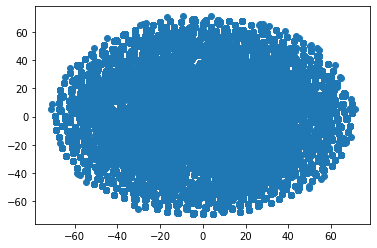

In [43]:
#plotting t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [44]:
from sklearn.cluster import KMeans

In [45]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow


,k,inertia
0,1,203230144.0
1,2,132072144.0
2,3,83427760.0
3,4,61192064.0
4,5,49918344.0
5,6,41282744.0
6,7,34555104.0
7,8,30424758.0
8,9,27642668.0
9,10,24906982.0


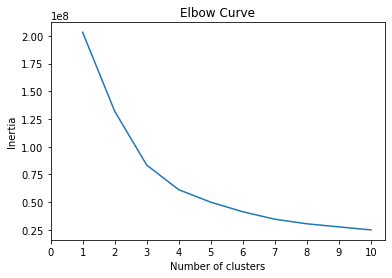

In [46]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [48]:
clusters = get_clusters(3, df_tsne)

In [49]:
clusters

,X,Y,class
0,-7.501112,-8.634844,2
1,-7.531014,-8.660707,2
2,-7.522689,-8.666127,2
3,-7.528540,-8.656153,2
4,-7.505186,-8.648683,2
...,...,...,...
104505,-25.769165,60.761406,1
104506,-24.653992,60.767948,1
104507,-26.819981,61.681595,1
104508,-25.812897,60.800697,1


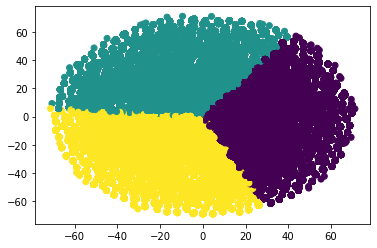

In [50]:
# Plot the results
plt.scatter(clusters["X"], clusters["Y"], c = clusters["class"])
plt.show()